In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data = 'square'
# budget = 200

data = 'citeseer'
budget = 500

n_classes = 2

policies = [
    'ens jensen greedy',
    'greedy',
    # 'round robin greedy',
    'classical ens'
]

n_exps = 20
init_size = 1
group_size = n_classes - 1

basepath = os.path.join('../../data/results', data, str(group_size))

probs = np.ones((len(policies), n_exps, budget, n_classes), dtype=float) * -1

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_probs = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__probs__{i + 1}.csv'),
            delimiter=','
        )
        
        probs[p_ind, i, :, :] = tmp_probs
        
assert np.all(probs != -1)

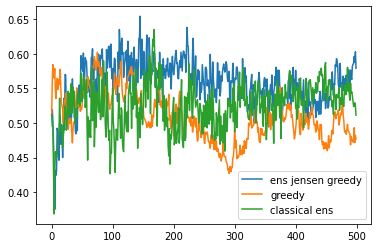

In [6]:
for p_ind, policy in enumerate(policies):
    plt.plot(probs.mean(axis=1)[..., 1][p_ind], label=policy)
    
plt.legend();

/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/quannguyen/anaconda3/envs/diverse_as/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).s

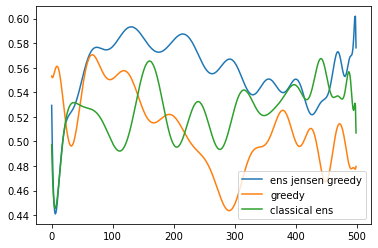

In [21]:
for p_ind, policy in enumerate(policies):
    poly = np.polyfit(np.arange(budget), probs.mean(axis=1)[..., 1][p_ind], 101)
    plt.plot(np.poly1d(poly)(np.arange(budget)), label=policy)
    
plt.legend();